In [1]:
import torch
import torch.nn as nn
from torchvision import models, transforms
import matplotlib.pyplot as plt

import numpy as np
import cv2
from torch.autograd import Variable

In [2]:
test_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((150,150)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [3]:
PATH = './model/model_150.pt'
device = torch.device('cpu')
class_names = ['covid19', 'normal']

In [4]:
#Defining Model Architecture
def CNN_Model(pretrained):
    model = models.densenet121(pretrained=pretrained)
    num_ftrs = model.classifier.in_features
    model.classifier = nn.Linear(num_ftrs, len(class_names))
    model.to(torch.device('cpu'))
    return model
inf_model = CNN_Model(pretrained=False)

In [5]:
inf_model.to(torch.device('cpu'))
inf_model.load_state_dict(torch.load(PATH, map_location='cpu'))
inf_model.eval()
print('Inference Model Loaded on CPU')

Inference Model Loaded on CPU


In [6]:
def predict(img_path):
    image = cv2.imread(img_path)
    if np.array(image).shape[-1] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
    image_tensor = test_transforms(image)
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    # print(input.shape)
    input = input.to(torch.device('cpu'))
    out = inf_model(input)
    _, preds = torch.max(out, 1)
    idx = preds.cpu().numpy()[0]
    pred_class = class_names[idx]
    score = out[0][0].item()
    plt.imshow(np.array(image))
    print("Predicted: {}".format(pred_class))

Predicted: normal


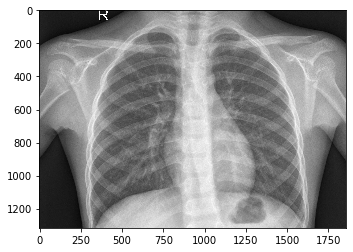

In [7]:
predict('./test/normal_test1.jpeg')

Predicted: covid19


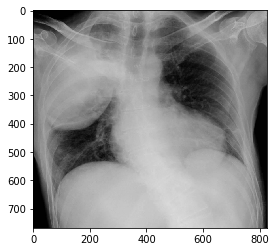

In [8]:
predict('./test/covid_test1.jpg')

In [9]:
def predict1(image):
    if  image.shape[-1] == 4:
        image_cv = cv2.cvtColor(image, cv2.COLOR_RGBA2BGR)
    if  image.shape[-1] == 3:
        image_cv = cv2.cvtColor(image, cv2.COLOR_BGR2BGR)
    if  len(image.shape)== 2:
        image_cv = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    image_tensor = test_transforms(image_cv)
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    #print(input.shape)
    input = input.to(torch.device('cpu'))
    out = inf_model(input)
    _, preds = torch.max(out, 1)
    idx = preds.cpu().numpy()[0]
    pred_class = class_names[idx]
    print(idx)
    print("Predicted: {}".format(pred_class))
    return pred_class

In [5]:
from PIL import Image
import numpy as np

In [6]:
img = Image.open('./test/normal_test1.jpeg')


In [7]:
from predict import predict as pd

In [8]:
pd(np.array(img))

Inference Model Loaded on CPU
[[ 0 32 33 ... 33 34  0]
 [ 0 33 33 ... 34 34  0]
 [ 1 33 33 ... 34 34  0]
 ...
 [ 0 28 28 ... 34 35  0]
 [ 0 29 28 ... 34 35  0]
 [ 0 29 29 ... 35 34  0]]
torch.Size([1, 3, 150, 150])
1
Predicted: normal


'normal'